<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/MallcProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [490]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

print(Mall_c.head())

<ipython-input-490-f94d31986fc5>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [491]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [492]:
Mall_c.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [493]:
#drop Customer ID column (not useful)

Mall_c=Mall_c.drop(['CustomerID'],axis=1)
print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [494]:
#Applied Ordinal Encoder to the gender column

from sklearn.preprocessing import OrdinalEncoder

gender_encoder = OrdinalEncoder()
Mall_c[['Gender']] = gender_encoder.fit_transform(Mall_c[['Gender']])

print(Mall_c.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0     1.0   19                  15                      39
1     1.0   21                  15                      81
2     0.0   20                  16                       6
3     0.0   23                  16                      77
4     0.0   31                  17                      40


In [495]:
#feature engineering create new feature (difference between income and spending )
#their usefulness : gives an idea of financial balance of a person

Mall_c['diff_income_spending'] = Mall_c['Annual Income (k$)'] - Mall_c['Spending Score (1-100)']
print(Mall_c)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0       1.0   19                  15                      39   
1       1.0   21                  15                      81   
2       0.0   20                  16                       6   
3       0.0   23                  16                      77   
4       0.0   31                  17                      40   
..      ...  ...                 ...                     ...   
195     0.0   35                 120                      79   
196     0.0   45                 126                      28   
197     1.0   32                 126                      74   
198     1.0   32                 137                      18   
199     1.0   30                 137                      83   

     diff_income_spending  
0                     -24  
1                     -66  
2                      10  
3                     -61  
4                     -23  
..                    ...  
195                    41  
196    

In [496]:
#applied a stander scaler to the data

from sklearn.preprocessing import StandardScaler
import pandas as pd

columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age','diff_income_spending']
Mall_c_scale = Mall_c[columns]
Mall_c_gender = Mall_c[['Gender']]

scaler = StandardScaler()
Mall_data = scaler.fit_transform(Mall_c_scale)
scaled_df = pd.DataFrame(Mall_data,columns=columns)

Mall_data = pd.concat([Mall_c_gender.reset_index(drop=True), scaled_df], axis=1)
print(Mall_data.head())

   Gender  Annual Income (k$)  Spending Score (1-100)       Age  \
0     1.0           -1.738999               -0.434801 -1.424569   
1     1.0           -1.738999                1.195704 -1.281035   
2     0.0           -1.700830               -1.715913 -1.352802   
3     0.0           -1.700830                1.040418 -1.137502   
4     0.0           -1.662660               -0.395980 -0.563369   

   diff_income_spending  
0             -0.939858  
1             -2.088694  
2             -0.009847  
3             -1.951928  
4             -0.912504  


# PCA Part

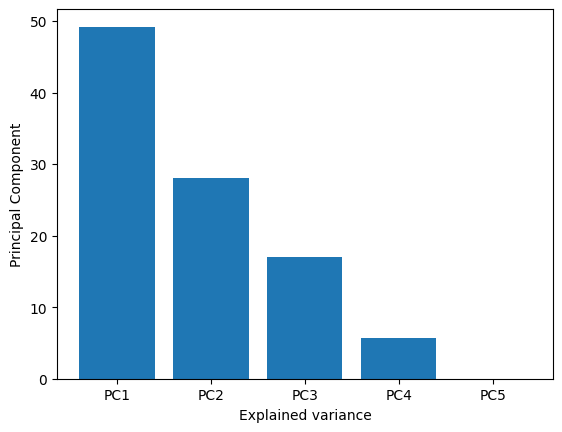

In [497]:
#applied PCA on  datasets and Analyze explained variance

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
PCA_Mall = pca.fit_transform(Mall_data)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1) , height=per_var, tick_label=labels)
plt.xlabel('Explained variance')
plt.ylabel('Principal Component')
plt.show()

In [498]:
#number of components preserving 90–95% variance

condition = (cumulative_variance >= 0.90) & (cumulative_variance<= 0.95)
n_components = np.argmax(condition)

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(Mall_data)

the minimum number of components preserving 90–95% variance: 2


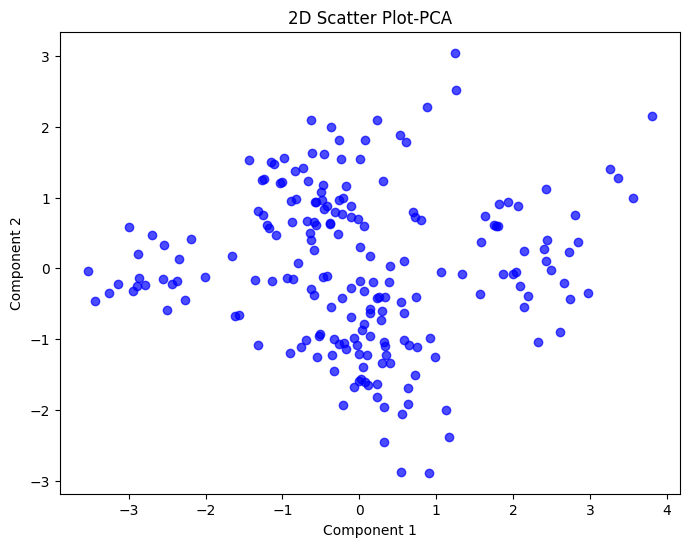

In [499]:
#Visualize reduced space (2D scatter plots)

import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], alpha=0.7, c='blue')
plt.title('2D Scatter Plot-PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# **T-SNE Part**

In [500]:
#Applied T-SNE on dataset

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)

TSNE_Mall = tsne.fit_transform(Mall_data)

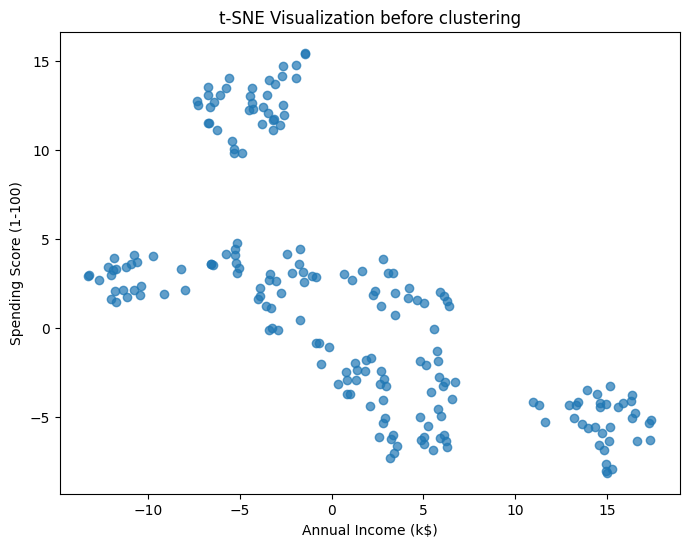

In [501]:
#2D t-SNE plots before clustering

import matplotlib.pyplot as plt
TSNE_df = pd.DataFrame(TSNE_Mall, columns=['Annual Income (k$)', 'Spending Score (1-100)'])


plt.figure(figsize=(8,6))
plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], alpha=0.7)
plt.title('t-SNE Visualization before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

# **K-Means Clustering**

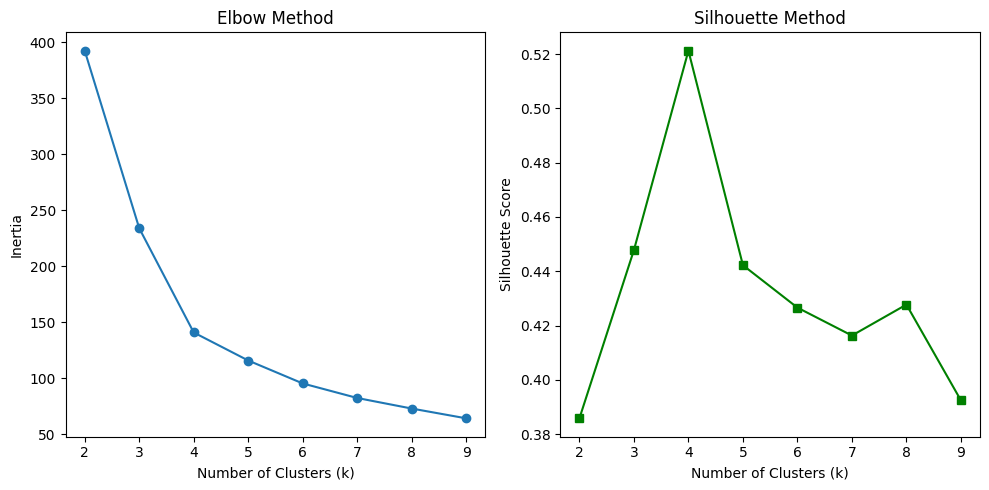

In [502]:
#Elbow curves and Silhouette score plots

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

inertias=[]
silhouette_scores=[]
k_range=range(2,10)
for k in k_range:
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(x_pca_reduced,kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.subplot(1,2,2)
plt.plot(k_range,silhouette_scores,marker='s',color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

In [503]:
#

from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(Mall_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

print(inertias)

[849.2799999999995, 584.1245207993252, 414.95220501380606, 313.9731188655859, 250.95018076162214, 216.11108764177044, 200.8687961759306, 181.89197532896478, 168.42015362582256]


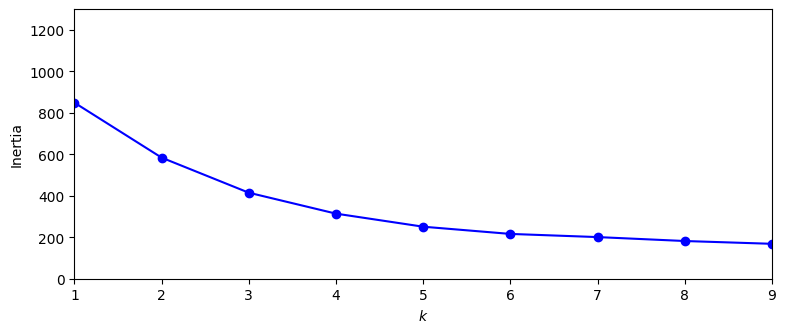

In [504]:
# Elbow method to determine best k and Inertia

plt.figure(figsize=(9, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")

plt.axis([1, 9, 0, 1300])
plt.show()

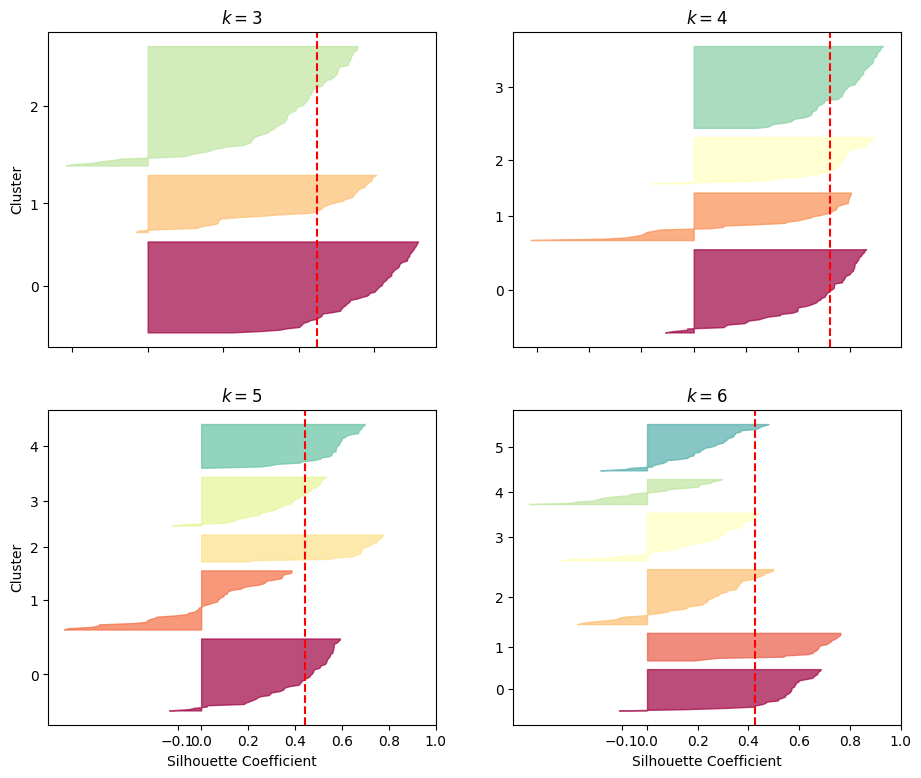

In [505]:
#Silhouette score to determine best k

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

In [506]:
#Applied K-Means clustering

kmeans = KMeans(n_clusters=3,n_init=415,random_state=42)
kmeans_pred = kmeans.fit_predict(Mall_data)

print(kmeans_pred)

[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1]


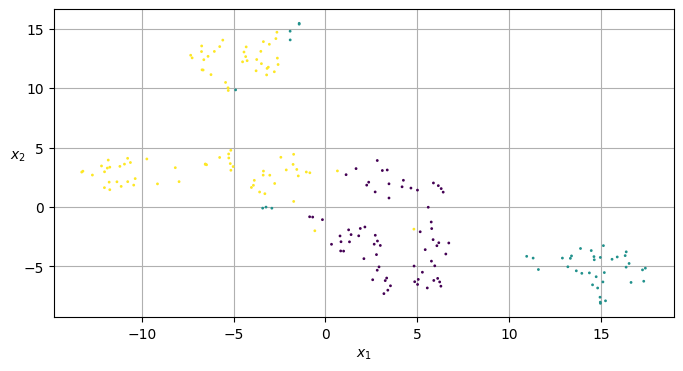

In [507]:
#2D t-SNE plots after K-Means clustering


def plot_clusters(TSNE_df, y=kmeans_pred):
    plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_df)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

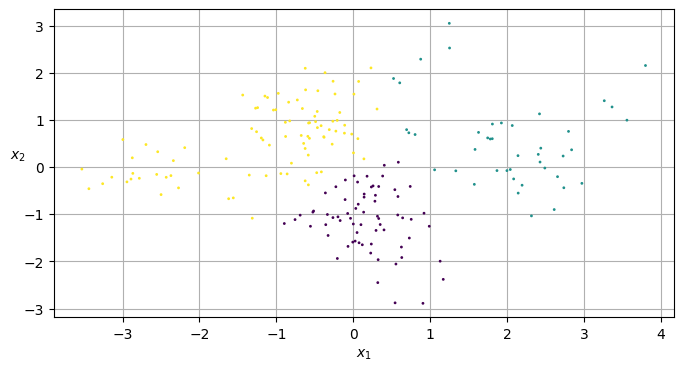

In [508]:
#PCA plots after K-Means clustering

def plot_clusters(x_pca_reduced, y=kmeans_pred):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

# **K-Means++ Initialization part**

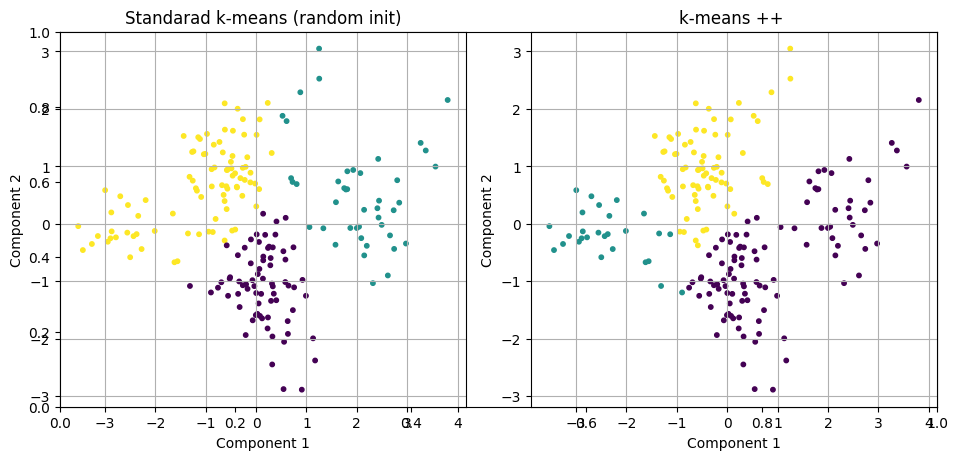

In [509]:
#Compare standard K-Means and K-Means++

k=3
kmeans_random=KMeans(n_clusters=k,init='random',n_init=1,random_state=1)
kmeans_random.fit(x_pca_reduced)
kmeans_plus=KMeans(n_clusters=k,init='k-means++',n_init=1,random_state=1)
kmeans_plus.fit(x_pca_reduced)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_random.labels_, cmap='viridis',s=10)
plt.title('Standarad k-means (random init)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_plus.labels_, cmap='viridis',s=10)
plt.title('k-means ++ ')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.grid()
plt.show()

In [510]:
#initialization impacts convergence and results

inertias_random=kmeans_random.inertia_
inertias_plus=kmeans_plus.inertia_
sil_random=silhouette_score(x_pca_reduced,kmeans_random.labels_)
sil_plus=silhouette_score(x_pca_reduced,kmeans_plus.labels_)
print('Standarad k-means (random init):')
print('Inertia:',inertias_random)
print('Silhouette Score:',sil_random)
print('K-means++:')
print('Inertia:',inertias_plus)
print('Silhouette Score:',sil_plus)

Standarad k-means (random init):
Inertia: 233.81122497728452
Silhouette Score: 0.4478000053793544
K-means++:
Inertia: 292.95899730001435
Silhouette Score: 0.3979442781642101


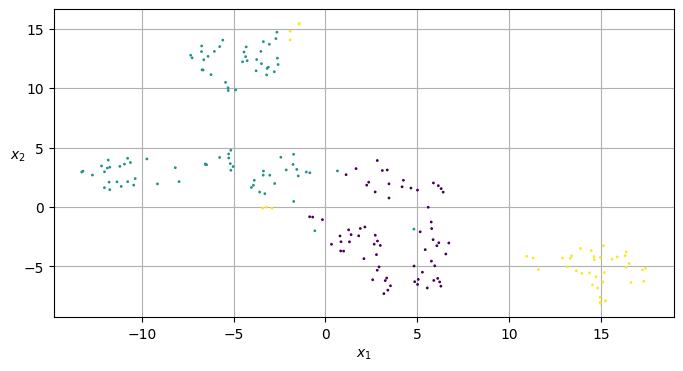

In [511]:
#2D t-SNE plots after K-Means++

kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans_pred_plus = kmeans.fit_predict(Mall_data)

def plot_clusters(TSNE_df, y=kmeans_pred_plus):
    plt.scatter(TSNE_df['Annual Income (k$)'], TSNE_df['Spending Score (1-100)'], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_df)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

# **Mini-Batch K-Means Part**

In [512]:
#Applied Mini-Batch clustering

from sklearn.cluster import MiniBatchKMeans

minibatch = MiniBatchKMeans(n_clusters=4,random_state=42)
mimibatch_pred=minibatch.fit_predict(TSNE_Mall)

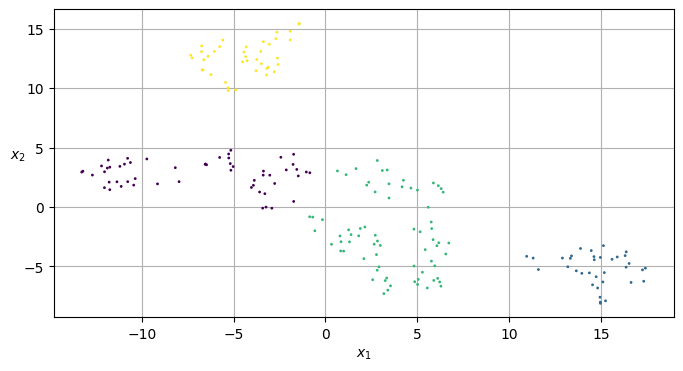

In [513]:
#2D t-SNE plots after Mini-Batch clustering

def plot_clusters(TSNE_Mall, y=mimibatch_pred):
    plt.scatter(TSNE_Mall[:, 0], TSNE_Mall[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(TSNE_Mall)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

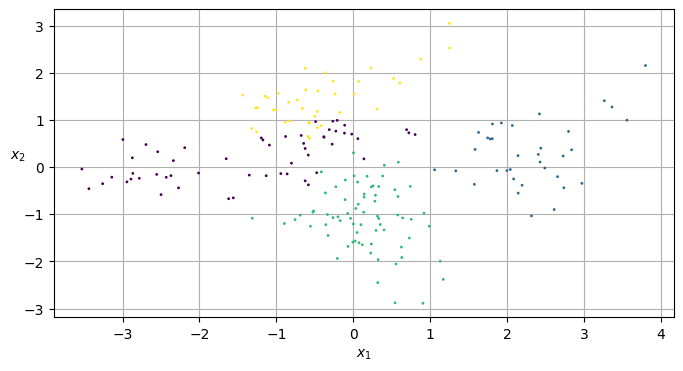

In [514]:
#PCA plots after Mini-Batch clustering

def plot_clusters(x_pca_reduced, y=mimibatch_pred):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Clustering with k = 20

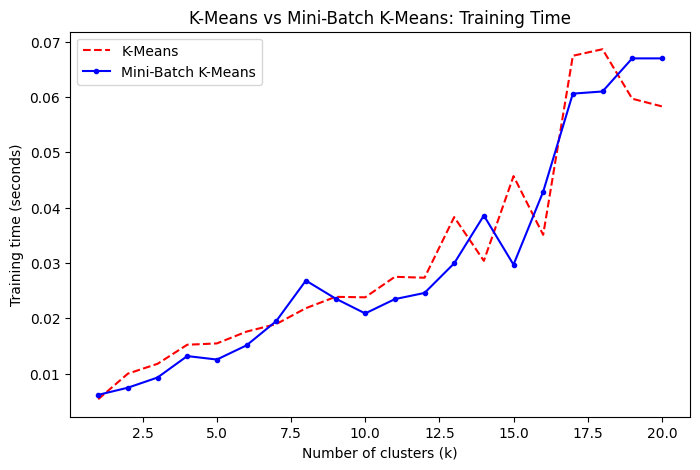

In [515]:
#Compare speed  Mini-Batch with standard K-Means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from timeit import default_timer as timer

X = Mall_data.values

max_k = 20
times = np.empty((max_k, 2))

for k in range(1, max_k + 1):
    print(f"\rClustering with k = {k}", end="")

    # KMeans
    kmeans = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    start = timer()
    kmeans.fit(X)
    times[k - 1, 0] = timer() - start

    # MiniBatchKMeans
    minibatch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    start = timer()
    minibatch.fit(X)
    times[k - 1, 1] = timer() - start

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-Batch K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Training time (seconds)")
plt.title("K-Means vs Mini-Batch K-Means: Training Time")
plt.legend()
plt.show()

In [516]:
#Compare memory usage Mini-Batch with standard K-Means

import sys
print('memory usage for Mini-Batch :',sys.getsizeof(mimibatch_pred))
print('memory usage for K-Means :',sys.getsizeof(kmeans_pred))

memory usage for Mini-Batch : 912
memory usage for K-Means : 912


In [517]:
#Compare accuracy Mini-Batch with standard K-Means

kmeans_sil = silhouette_score(TSNE_Mall, kmeans_pred)
kmeans_inertia = kmeans.inertia_

mini_sil = silhouette_score(TSNE_Mall, mimibatch_pred)
mini_inertia = minibatch.inertia_

print("KMeans:")
print(f"Silhouette Score: {kmeans_sil:.3f}")
print(f"Inertia: {kmeans_inertia:.2f}")

print("\nMiniBatchKMeans:")
print(f"Silhouette Score: {mini_sil:.3f}")
print(f"Inertia: {mini_inertia:.2f}")


KMeans:
Silhouette Score: 0.433
Inertia: 87.52

MiniBatchKMeans:
Silhouette Score: 0.593
Inertia: 97.33


# **DBSCAN Clustering Part**

In [518]:
#grid search for dbscan

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


def silhouette_scorer(estimator, Mall_data):
    labels = estimator.fit_predict(Mall_data)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(Mall_data, labels)
    else:
        return -1

dbscan_grid={'eps': [3.5,4,5,6,7,8],
    'min_samples':[25,28,30,40]}

dbscanSearch=GridSearchCV(DBSCAN() , dbscan_grid , scoring=silhouette_scorer)

dbscanSearch.fit(Mall_data)
print(dbscanSearch.best_params_)

{'eps': 3.5, 'min_samples': 25}


In [519]:
#Applied DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=25)
dbscan.fit(TSNE_Mall)

DBSCAN(eps=3.5, min_samples=25)

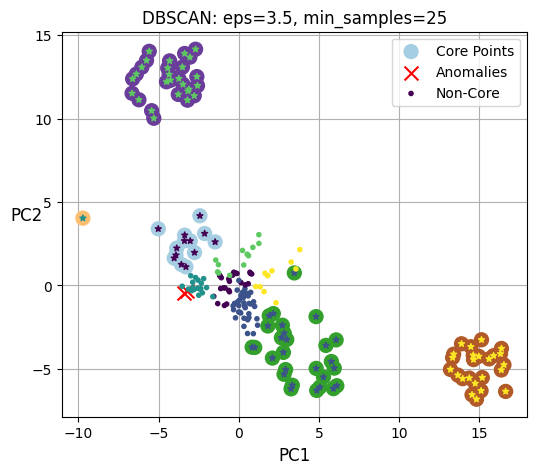

In [520]:
#PCA plots after DBSACN clustering

def plot_dbscan(dbscan, x_pca_reduced, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]

    plt.figure(figsize=(6, 5))
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired", label="Core Points")
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='*', s=20)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, label="Anomalies")
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", label="Non-Core")

    if show_xlabels:
        plt.xlabel("PC1", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("PC2", fontsize=12, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"DBSCAN: eps={dbscan.eps}, min_samples={dbscan.min_samples}")
    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.show()

plot_dbscan(dbscan, x_pca_reduced, size=100)


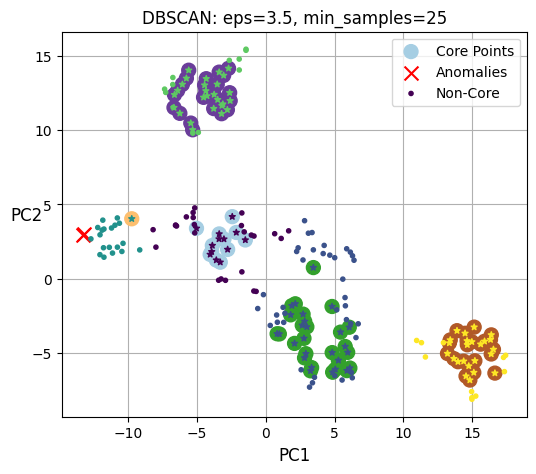

In [521]:
#2D t-SNE plots after DBSCAN clustering

def plot_dbscan(dbscan, x_pca_reduced, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]

    plt.figure(figsize=(6, 5))
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired", label="Core Points")
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='*', s=20)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, label="Anomalies")
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", label="Non-Core")

    if show_xlabels:
        plt.xlabel("PC1", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("PC2", fontsize=12, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"DBSCAN: eps={dbscan.eps}, min_samples={dbscan.min_samples}")
    plt.legend()
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.show()

plot_dbscan(dbscan, TSNE_Mall, size=100)